## Importing the libraries

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
import warnings


from sklearn.preprocessing import MinMaxScaler

# from feature_engine import variable_transformers as vt


## Importing the dataset

In [2]:
# data manipulation and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for saving the pipeline
import joblib

# from Scikit-learn
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Binarizer

# from feature-engine
from feature_engine.imputation import (
    AddMissingIndicator,
    MeanMedianImputer,
    CategoricalImputer,
)

from feature_engine.encoding import (
    RareLabelEncoder,
    OrdinalEncoder,
)

from feature_engine.transformation import LogTransformer

from feature_engine.selection import DropFeatures
from feature_engine.wrappers import SklearnTransformerWrapper

In [3]:
df = pd.read_csv('finalTrain.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [4]:
df.drop(['ID','Delivery_person_ID'],axis=1,inplace=True)

## Features

In [5]:
X = df.drop(columns=['Time_taken (min)'],axis=1)
X.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian


## Label

In [6]:
y = df['Time_taken (min)']
y

0        46
1        23
2        21
3        20
4        41
         ..
45579    32
45580    36
45581    16
45582    26
45583    36
Name: Time_taken (min), Length: 45584, dtype: int64

## Setting the configuration 

In [7]:
# all set over here
numerical_columns = ['Delivery_person_Age','Delivery_person_Ratings','multiple_deliveries',"Vehicle_condition"]



# we will have to deal with missing values as well present in the categorical variables
# Weather conditions
# Road_traffic_density
# Festival
# City

# all set over here and deal with missing values over here 
# ordinal encoder (by default)
# use all of them and select which will give more accuracy to us
categorical_columns_with_less_classes=['Weather conditions','Road_traffic_density',
                                       'Type_of_order','Type_of_vehicle','Festival','City']





categorical_columns_with_frequent=['Time_Orderd',
 'Weather conditions',
 'Road_traffic_density',
 'Festival',
 'City']
# all set over here 
# we will use count or frequency encoding (bedefault)
# use of of them and select which will give more accuracy to us
# deal with missing values over here as well


#['Time_Orderd',  
#  'Weather conditions',
#  'Road_traffic_density',
#  'Festival',
#  'City']
# 'Delivery_person_ID',
categorical_columns_with_multiple_classes=['Order_Date','Time_Orderd','Time_Order_picked']








# list of all the variables having stirng 
categorical_columns = [
 'Order_Date',
 'Time_Orderd',
 'Time_Order_picked',
 'Weather conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City']










In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer



In [9]:
from category_encoders.target_encoder import TargetEncoder

## Creating the pipeline

In [10]:
# all set over here
num_pipeline= Pipeline(
                steps=[

                ("imputer",SimpleImputer(strategy="mean")),
                ("scaler",StandardScaler())

                ]
            )


# all set over here as well
cat_pipeline_with_less_classes=Pipeline(

                steps=[
                ("imputer",SimpleImputer(strategy="most_frequent")),
                ("encoder",OneHotEncoder()),
                ("scaler",StandardScaler(with_mean=False))
                ]

            )

cat_pipeline_with_multiple_classes=Pipeline(

                steps=[
                ("imputer",SimpleImputer(strategy="most_frequent")),
                ("TargetEncoder",TargetEncoder()),
                ("scaler",StandardScaler(with_mean=False))
                ]

            )




In [11]:
preprocessor=ColumnTransformer(
                [
                ("num_pipeline",num_pipeline,numerical_columns),
                
                    
                
                ("cat_pipeline_with_less_classes",cat_pipeline_with_less_classes,categorical_columns_with_less_classes),
                ("cat_pipeline_with_multiple_classes",cat_pipeline_with_multiple_classes,categorical_columns_with_multiple_classes)

                    
                ]
)

In [12]:
y

0        46
1        23
2        21
3        20
4        41
         ..
45579    32
45580    36
45581    16
45582    26
45583    36
Name: Time_taken (min), Length: 45584, dtype: int64

In [13]:
X = preprocessor.fit_transform(X,y)

In [14]:
X.shape

(45584, 30)

## Splitting the dataset into training set and testing set

In [15]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape, X_test.shape

((36467, 30), (9117, 30))

## Function for evaluating the performance of our model

In [16]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

## Training the model using different algorithms 

In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.8954
- Mean Absolute Error: 4.7011
- R2 Score: 0.6055
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.9302
- Mean Absolute Error: 4.7056
- R2 Score: 0.5996


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.6120
- Mean Absolute Error: 5.2769
- R2 Score: 0.5038
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.6339
- Mean Absolute Error: 5.2837
- R2 Score: 0.4990


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.8947
- Mean Absolute Error: 4.7014
- R2 Score: 0.6056
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.9275
- Mean Absolute Error: 4.7034
- R2 Score: 0.6000


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 3.8744
- Mean Absolute Error: 3.0046
- R2 Score: 0.8296
-----------------------

In [18]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
5,Random Forest Regressor,0.822032
6,XGBRegressor,0.821009
3,K-Neighbors Regressor,0.734578
4,Decision Tree,0.671219
2,Ridge,0.599986
0,Linear Regression,0.599625
7,AdaBoost Regressor,0.593960
1,Lasso,0.498958


In [19]:
lin_model = XGBRegressor()
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 82.10


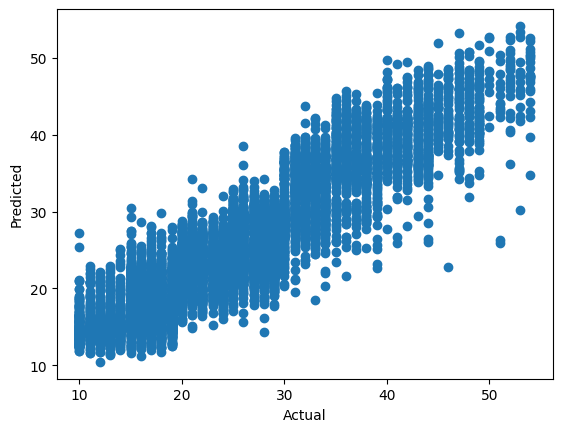

In [20]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

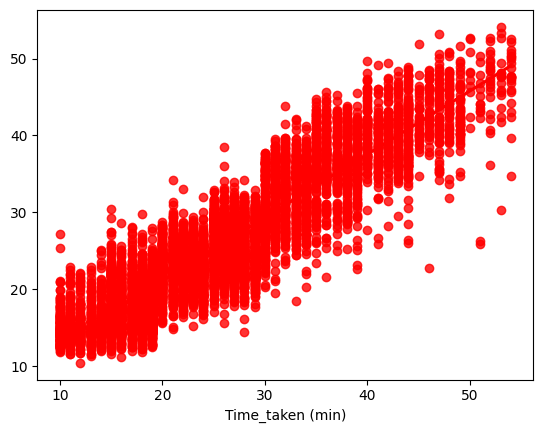

In [21]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [22]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
26576,13,15.023198,-2.023198
32381,30,25.362745,4.637255
43881,49,51.680660,-2.680660
15170,17,23.146631,-6.146631
5404,20,24.624836,-4.624836
...,...,...,...
17316,34,37.698208,-3.698208
23234,28,22.881695,5.118305
26873,16,15.891302,0.108698
41142,37,37.279884,-0.279884
